# Liver Disease Prediction Model

This notebook trains a classification model to predict liver disease based on blood test results.

**Features:** Age, Gender, Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase, Total Proteins, Albumin, Albumin/Globulin Ratio  
**Target:** Liver disease (1) or Not (2)  
**Dataset:** Indian Liver Patient Dataset (ILPD)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_score, recall_score, f1_score
)
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plot styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries loaded!")

✓ Libraries loaded!


## Load Dataset

**Dataset:** https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

In [2]:
# TODO: Load your liver disease dataset
df = pd.read_csv('../Frontend/data/indian_liver_patient.csv')
display(df.head())
print(f"Shape: {df.shape}")

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Shape: (583, 11)


## EDA

In [3]:
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget distribution:")
print(df['Dataset'].value_counts())  # 1=liver patient, 2=non-liver patient

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None

Missing values:
Age                           0
Gender                        0
Total

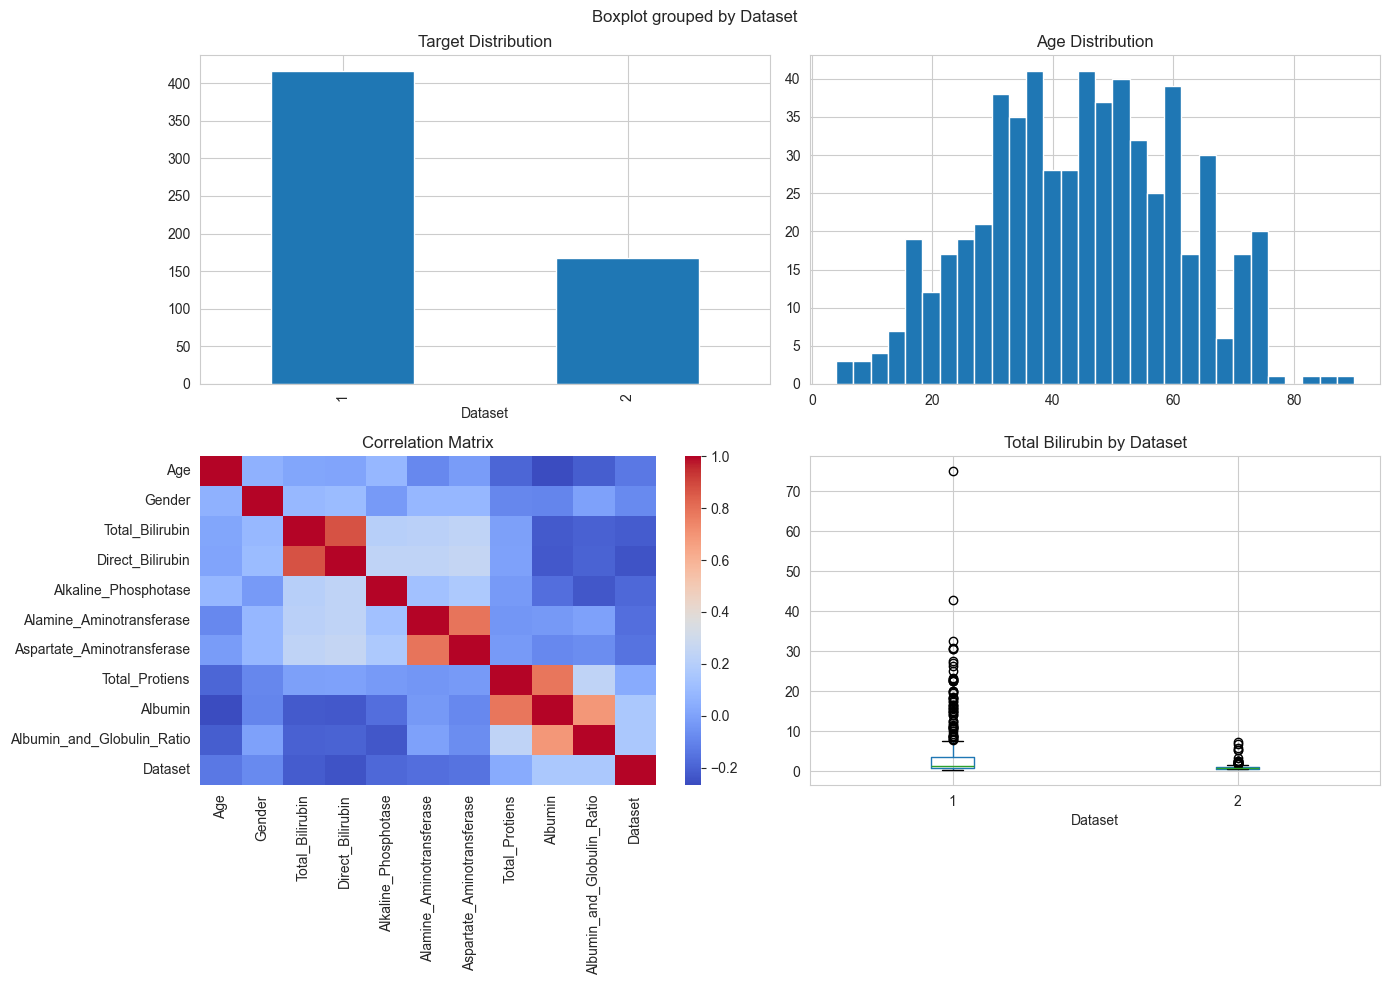

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
df['Dataset'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Target Distribution')
df['Age'].hist(bins=30, ax=axes[0,1])
axes[0,1].set_title('Age Distribution')

# Ensure only numeric columns are used for correlation (convert Gender to numeric first)
numeric_df = df.copy()
numeric_df['Gender'] = numeric_df['Gender'].map({'Male': 1, 'Female': 0})
sns.heatmap(numeric_df.select_dtypes(include=np.number).corr(), annot=False, cmap='coolwarm', ax=axes[1,0])
axes[1,0].set_title('Correlation Matrix')

df.boxplot(column='Total_Bilirubin', by='Dataset', ax=axes[1,1])
axes[1,1].set_title('Total Bilirubin by Dataset')
plt.tight_layout()
plt.show()

## Preprocessing

In [5]:
# Handle missing values
df = df.fillna(df.median(numeric_only=True))

# Encode gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Separate features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']
# Convert target: 1=disease, 0=no disease
y = (y == 1).astype(int)

print(f"Features: {X.shape}")
print(f"Target: {y.value_counts()}")

Features: (583, 10)
Target: Dataset
1    416
0    167
Name: count, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✓ Data split and scaled!")

✓ Data split and scaled!


## Model Training

In [ ]:
# Train multiple models with optimizer configurations
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        random_state=42
        # Optimizer: Greedy search (Gini Impurity/Information Gain)
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,  # Gradient descent step size
        random_state=42
        # Optimizer: Gradient Descent
    ),
    'SVM': SVC(
        probability=True,
        kernel='rbf'
        # Optimizer: SMO (Sequential Minimal Optimization)
    )
}

print("🔧 Optimizers Used:")
print("   - Random Forest: Greedy Search (Information Gain)")
print("   - Gradient Boosting: Gradient Descent")
print("   - SVM: SMO (Sequential Minimal Optimization)\n")

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:20s} Accuracy: {acc:.4f}")

Random Forest        Accuracy: 0.7521
Gradient Boosting    Accuracy: 0.7265
SVM                  Accuracy: 0.7094
Gradient Boosting    Accuracy: 0.7265
SVM                  Accuracy: 0.7094


### Optimizer Comparison

Different machine learning algorithms use different optimization strategies:

| Model | Optimizer | Strategy | Advantages |
|-------|-----------|----------|------------|
| **Random Forest** | Greedy Search | Splits nodes by maximizing information gain | Fast, parallelizable, no hyperparameter tuning for optimizer |
| **Gradient Boosting** | Gradient Descent | Fits trees to gradient of loss function | Accurate, handles complex patterns, adjustable learning rate |
| **SVM** | SMO | Solves quadratic programming problem | Effective in high dimensions, memory efficient |

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.63      0.35      0.45        34
Liver Disease       0.78      0.92      0.84        83

     accuracy                           0.75       117
    macro avg       0.70      0.63      0.65       117
 weighted avg       0.73      0.75      0.73       117



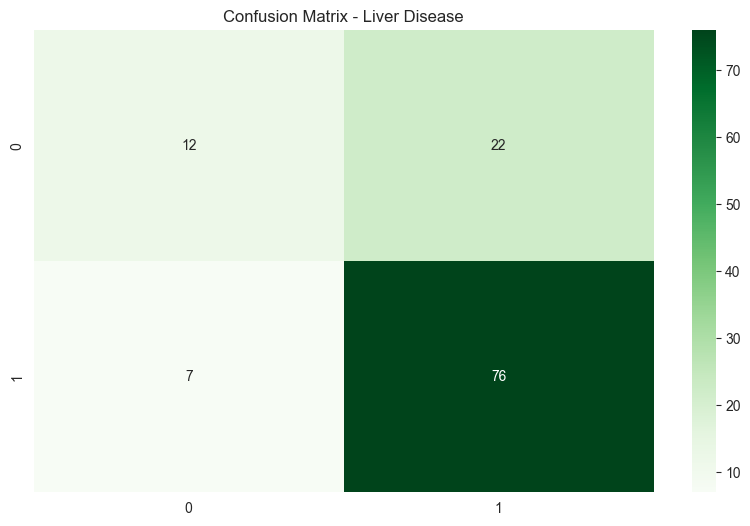

In [8]:
# Select best model and evaluate
best_model = models['Random Forest']  # Replace with actual best
y_pred = best_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Liver Disease']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Liver Disease')
plt.show()

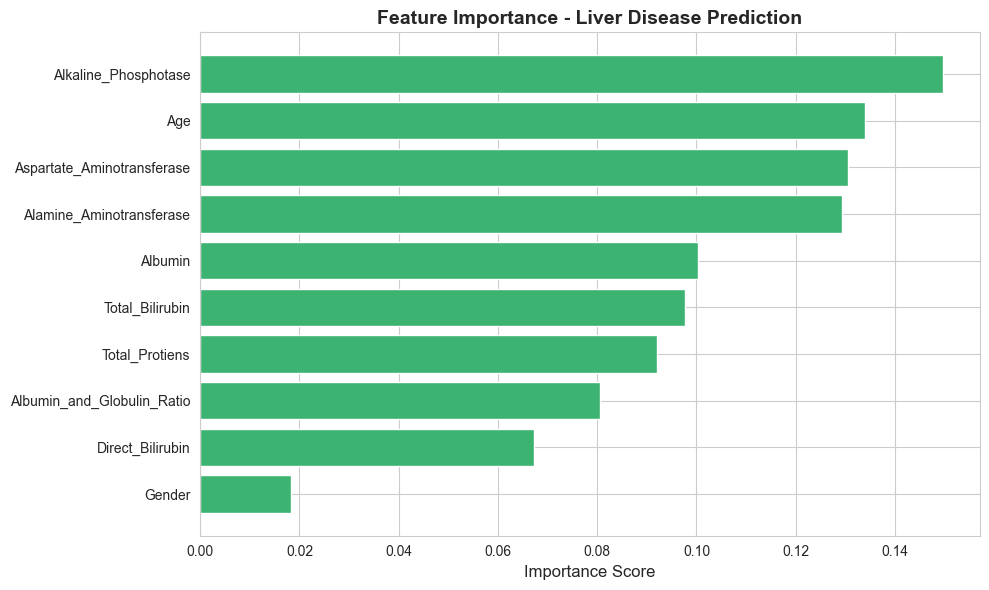


Most Important Blood Test Markers:
                   feature  importance
      Alkaline_Phosphotase    0.149656
                       Age    0.133992
Aspartate_Aminotransferase    0.130617
  Alamine_Aminotransferase    0.129409
                   Albumin    0.100382
           Total_Bilirubin    0.097688
            Total_Protiens    0.092041
Albumin_and_Globulin_Ratio    0.080661
          Direct_Bilirubin    0.067300
                    Gender    0.018255


In [9]:
# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['feature'], importance_df['importance'], color='mediumseagreen')
    plt.xlabel('Importance Score', fontsize=12)
    plt.title('Feature Importance - Liver Disease Prediction', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nMost Important Blood Test Markers:")
    print(importance_df.to_string(index=False))

### Performance Metrics

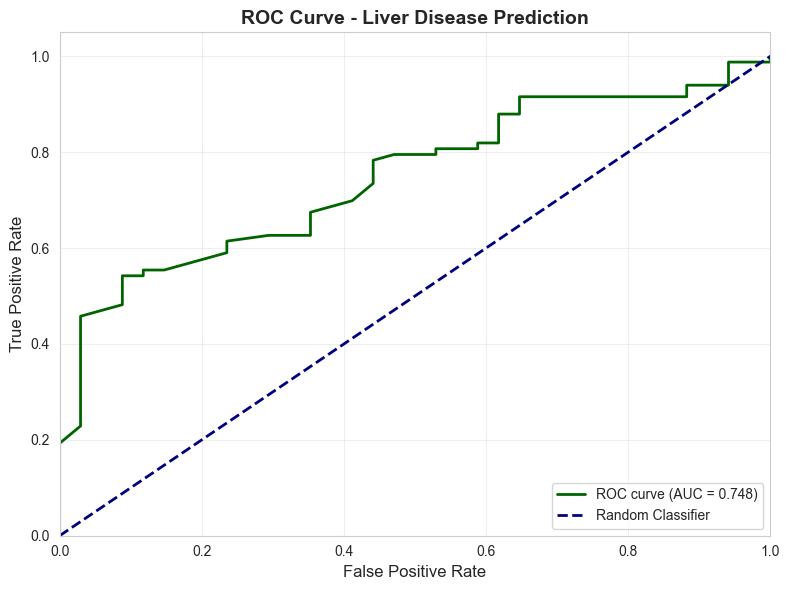

Area Under ROC Curve: 0.7477


In [10]:
# ROC Curve
# Ensure predicted probabilities are available (compute if missing)
if 'y_proba' not in globals():
	if hasattr(best_model, 'predict_proba'):
		y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
	elif hasattr(best_model, 'decision_function'):
		scores = best_model.decision_function(X_test_scaled)
		# scale decision scores to [0, 1]
		y_proba = (scores - scores.min()) / (scores.max() - scores.min())
	else:
		# fallback: use predicted labels as a proxy for probabilities (not ideal)
		y_proba = best_model.predict(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Liver Disease Prediction', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Area Under ROC Curve: {roc_auc:.4f}")

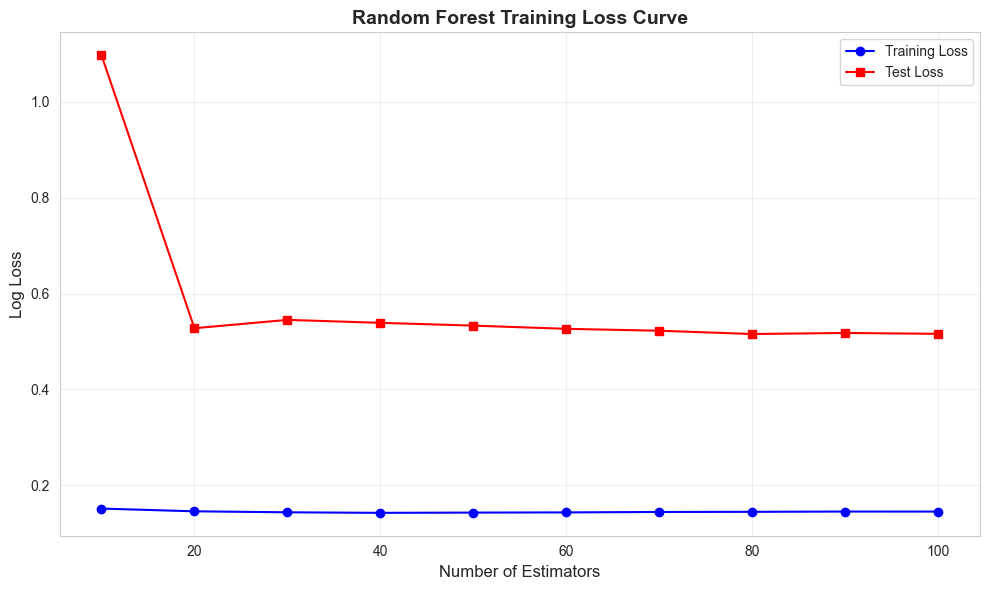

Final Training Loss: 0.1454
Final Test Loss: 0.5160


In [11]:
# Training Loss Curve for Random Forest (using staged predictions)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss

# Retrain model incrementally to track loss
train_losses = []
test_losses = []
n_estimators_range = range(10, 101, 10)

for n_est in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    train_proba = rf_model.predict_proba(X_train_scaled)
    test_proba = rf_model.predict_proba(X_test_scaled)
    
    train_loss = log_loss(y_train, train_proba)
    test_loss = log_loss(y_test, test_proba)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_losses, label='Training Loss', marker='o', color='blue')
plt.plot(n_estimators_range, test_losses, label='Test Loss', marker='s', color='red')
plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Log Loss', fontsize=12)
plt.title('Random Forest Training Loss Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Test Loss: {test_losses[-1]:.4f}")

### ROC Curve

📊 Test Log Loss: 0.5157

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.63      0.35      0.45        34
Liver Disease       0.78      0.92      0.84        83

     accuracy                           0.75       117
    macro avg       0.70      0.63      0.65       117
 weighted avg       0.73      0.75      0.73       117



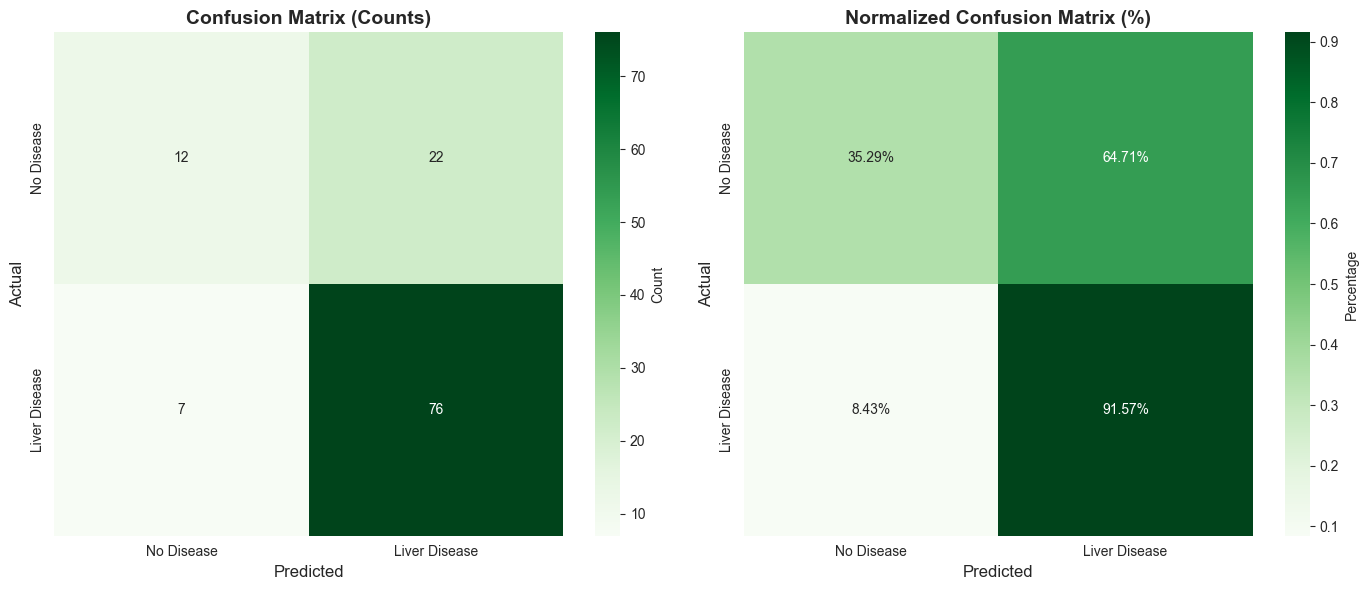


Confusion Matrix Breakdown:
  True Negatives:  12
  False Positives: 22
  False Negatives: 7 ⚠️
  True Positives:  76


In [12]:
# Import log loss metric
from sklearn.metrics import log_loss

# Detailed evaluation with enhanced confusion matrix
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
y_proba_full = best_model.predict_proba(X_test_scaled)

# Calculate log loss
test_log_loss = log_loss(y_test, y_proba_full)
print(f"📊 Test Log Loss: {test_log_loss:.4f}\n")

print("Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Liver Disease']))

# Enhanced Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Count-based confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Disease', 'Liver Disease'],
            yticklabels=['No Disease', 'Liver Disease'],
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=12)
ax1.set_xlabel('Predicted', fontsize=12)

# Normalized confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=['No Disease', 'Liver Disease'],
            yticklabels=['No Disease', 'Liver Disease'],
            ax=ax2, cbar_kws={'label': 'Percentage'})
ax2.set_title('Normalized Confusion Matrix (%)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=12)
ax2.set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

# Detailed metrics
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"  True Negatives:  {tn}")
print(f"  False Positives: {fp}")
print(f"  False Negatives: {fn} ⚠️")
print(f"  True Positives:  {tp}")